# Kernel Machines

## Test multiclass SVM - without kernel

In [198]:
from metric import * 

from svm import *

In [199]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Toy data
np.random.seed(42)
X = np.random.randn(150, 2)
y = np.repeat([0, 1, 2], 50)
X[y == 1] += 2.5
X[y == 2] += 5.0

########

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

def one_hot_list(n, k):
    # Create a tensor of zeros of size n
    tensor = n * [0]

    # Set the k-th dimension to 1
    tensor[k] = 1

    return tensor

y_train = [one_hot_list(3, y) for y in y_train]
y_train = torch.tensor(y_train)

y_test = [one_hot_list(3, y) for y in y_test]
y_test = torch.tensor(y_test)

###### 커널 ###
def someRandomKernel(x):
    return torch.cat((
            x, torch.tensor(
                 [x[0] + x[1], x[1] * x[1]] 
                )
    ))
identity = lambda x : x
####

kernelToMatrix = lambda x : torch.stack([someRandomKernel(x[i]) for i in range(x.size()[0])])
print("X_train.size()", X_train.size())
print("X_train.kernel()", kernelToMatrix(X_train).size())


X_train.size() torch.Size([105, 2])
X_train.kernel() torch.Size([105, 4])


x torch.Size([105, 4])
torch.Size([4, 3])
y torch.Size([105, 3])
bias: torch.Size([1, 3])
Sie of Loss:  torch.Size([])
x torch.Size([105, 4])
torch.Size([4, 3])
y torch.Size([105, 3])
bias: torch.Size([1, 3])
Sie of Loss:  torch.Size([])
x torch.Size([105, 4])
torch.Size([4, 3])
y torch.Size([105, 3])
bias: torch.Size([1, 3])
Sie of Loss:  torch.Size([])
x torch.Size([105, 4])
torch.Size([4, 3])
y torch.Size([105, 3])
bias: torch.Size([1, 3])
Sie of Loss:  torch.Size([])
x torch.Size([105, 4])
torch.Size([4, 3])
y torch.Size([105, 3])
bias: torch.Size([1, 3])
Sie of Loss:  torch.Size([])
x torch.Size([105, 4])
torch.Size([4, 3])
y torch.Size([105, 3])
bias: torch.Size([1, 3])
Sie of Loss:  torch.Size([])
x torch.Size([105, 4])
torch.Size([4, 3])
y torch.Size([105, 3])
bias: torch.Size([1, 3])
Sie of Loss:  torch.Size([])
x torch.Size([105, 4])
torch.Size([4, 3])
y torch.Size([105, 3])
bias: torch.Size([1, 3])
Sie of Loss:  torch.Size([])
x torch.Size([105, 4])
torch.Size([4, 3])
y torc

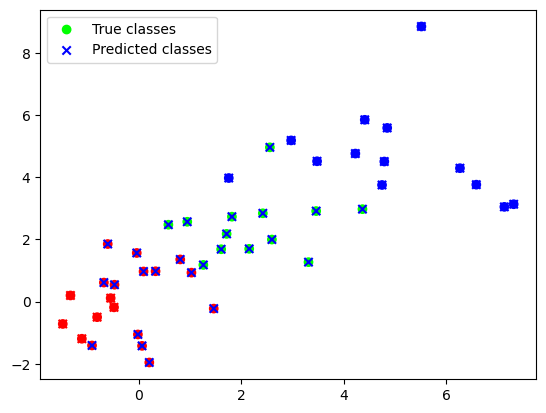

In [200]:

model = KernelSVM(input_dim=4, num_classes=3, kernel=someRandomKernel , C=1.0) #f lambda


model.train(X_train, y_train, epochs=100)

train_predictions = model.predict(X_train)
print(train_predictions.size())
test_predictions = model.predict(X_test)


########

train_accuracy = torch.sum(train_predictions == y_train) / y_train.numel()
test_accuracy = torch.sum(test_predictions == y_test) / y_test.numel()

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


print("Precision - micro is ",precision_micro(num_classes=3, predict=test_predictions, truth=y_test))
print("Precision - macro is ",precision_macro(num_classes=3, predict=test_predictions, truth=y_test))
print("Precision -weight is ",precision_weight(num_classes=3, predict=test_predictions, truth=y_test))

print("Recall - micro is ",recall_micro(num_classes=3, predict=test_predictions, truth=y_test))
print("Recall - micro is ",recall_macro(num_classes=3, predict=test_predictions, truth=y_test))
print("Recall -weight is ",recall_weight(num_classes=3, predict=test_predictions, truth=y_test))

print("F1-score is ",f1score(num_classes=3, predict=test_predictions, truth=y_test, precision=precision_weight, recall=recall_weight))

X_test_np = X_test.detach().numpy() if torch.is_tensor(X_test) else X_test
y_test_np = y_test.detach().numpy() if torch.is_tensor(y_test) else y_test
test_predictions_np = test_predictions.detach().numpy() if torch.is_tensor(test_predictions) else test_predictions

plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c=y_test_np, cmap='jet', marker='o', label='True classes')
plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c=test_predictions_np, cmap='jet', marker='x', label='Predicted classes')
plt.legend()
plt.show()




In [201]:
model.predict(torch.tensor([[3.0,3]]))

tensor([[0., 0., 1.]])